In [1]:
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp
import pandas as pd
from matplotlib import cm
from Tgsm import*
Cmap = cm.jet
Cmap.set_under("w")
%matplotlib inline

# Trajectory

In [2]:
dates =  ['2018-06-14 00:00:00','2018-06-15 00:00:00']
T = Time(dates)
dt = T[1]-T[0]
times = T[0] + dt*np.linspace(0.,1.,300)

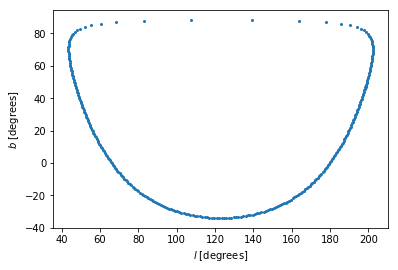

In [3]:
impath = '/home/hiram/Documentos/Tesis/Tesis_latex/Imagenes/'
l_gal,b_gal = trajectory(times)
plt.plot(l_gal,b_gal,'o',markersize=2)
plt.xlabel(r'$l$ [degrees]')
plt.ylabel(r'$b$ [degrees]')
plt.savefig(impath+'trayectory.png')

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


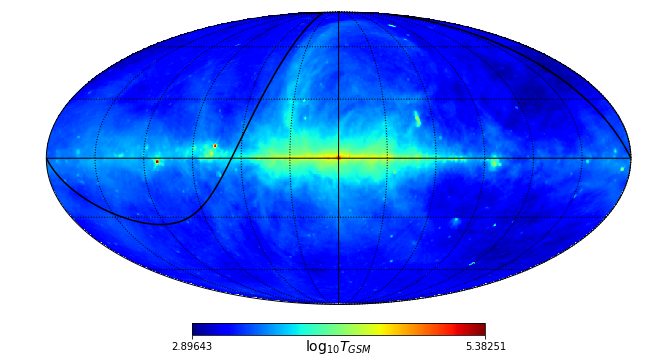

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


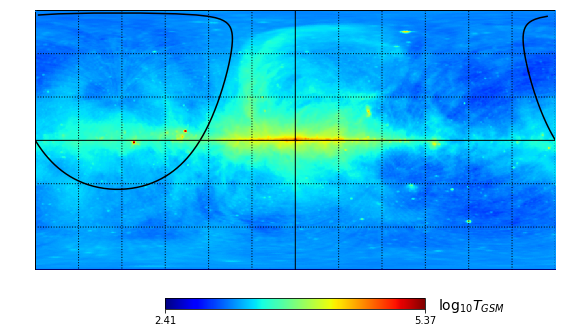

In [4]:
Data_70 = pd.read_hdf("gsm_maps/gsm_70MHz.hdf5")
bmap_gal = Data_70.values[:,0]
bmap_gal = np.log10(bmap_gal)
hp.mollview(bmap_gal,cmap=Cmap, unit = r'$\log_{10}T_{GSM}$',title='')
hp.projplot(l_gal, b_gal,'-k',lonlat=True)
hp.graticule()
plt.savefig(impath+'Trajectory_mollview.png')
plt.show()

hp.cartview(bmap_gal,cmap=Cmap, unit = r'$\log_{10}T_{GSM}$',title='')
hp.projplot(l_gal, b_gal,'-k',lonlat=True)
hp.graticule()
plt.savefig(impath+'Trajectory_cartview.png')
plt.show()

In [5]:
check_LST('2013-06-14 14:21:00')
check_LST('2013-06-14 00:00:00')
check_LST('2018-08-06 16:55:00',lon=-101.70,lat=21.15)

LST time: 23h59m58.0388s
LST time: 9h36m36.5988s
LST time: 7h08m55.1375s


<Longitude 7.148649300045555 hourangle>

# Beam Pattern

In [6]:
t0 = Time('2013-06-14 00:00:00')
dt = 4*u.hour
times = t0 + dt*np.arange(0,24/dt.value)
for i in range(len(times)):
    check_LST(t0+i*dt)
    l,b,Temp = pattern(time = times[i],Freq=70)
    nside = 32
    pix = hp.ang2pix(nside,l, b, lonlat=True)
    bmap_pat = np.zeros(hp.nside2npix(nside))
    bmap_pat[pix] = Temp
    hp.cartview(bmap_pat,cmap=Cmap)
    hp.projplot(l_gal, b_gal,'.k',lonlat=True)
    
    plt.savefig('Imagenes/'+str(t0+i*dt)+'_cartview_gal.png')
    plt.close()
    hp.mollview(bmap_pat,cmap=Cmap,cbar=False,title='')
    hp.projplot(l_gal, b_gal,'-k',lonlat=True)
    hp.graticule()
    plt.savefig(impath+str(t0+i*dt)+'_mollview_gal.png')
    plt.close()
    hp.mollview(bmap_pat,coord =['G','C'],cmap=Cmap,flip='geo',cbar=False,title='',notext=True)
    hp.graticule()
    plt.savefig(impath+str(t0+i*dt)+'_mollview_altaz.png')
    plt.close()

LST time: 9h36m36.5988s
0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.
0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.
LST time: 13h37m16.0246s
0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.
0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.
LST time: 17h37m55.4504s
0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.
0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.
LST time: 21h38m34.8762s
0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.
0.0 180.0 -180.0 180.0
The interval between parallels 

# Generate Simulated Data

In [7]:
#T_gsm('2013-06-14 00:00:00',bins=5) #Generate data example (convolution)

# Diurnal Variation and Simulated Temperature

In [3]:
Data = pd.read_hdf('calibration/Tgsm.hdf5')
Freqs = np.arange(50,91)

In [18]:
check_LST('2013-06-14 08:00:00')

LST time: 17h37m55.4504s


<Longitude 17.63206954635433 hourangle>

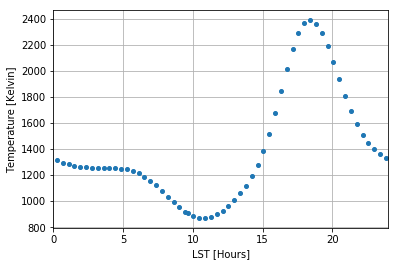

In [12]:
f=90
Temp = Data.loc[f].values
Time_ = (np.linspace(0,24,len(Temp))+9.62)%24 # For 2013-06-14 LST = UTC + 9:37 (9.62h)
plt.plot(Time_[::5],Temp[::5],'o',markersize = 4)
plt.xlabel('LST [Hours]')
plt.ylabel('Temperature [Kelvin]')
plt.xlim(0,24)
plt.grid()
#plt.savefig(impath+'variation_%dMHz.png'%f)

In [11]:
for f in Freqs:
    Temp = Data.loc[f].values
    Time_ = np.linspace(0,24,len(Temp))
    plt.plot(Time_[::5],Temp[::5],'-o',markersize = 4)
    plt.xlabel('UTC [Hours]')
    plt.ylabel('Temperature [Kelvin]')
    plt.xlim(0,24)
    plt.grid()
    plt.savefig('Imagenes/variation_%dMHz.png'%f)
    plt.close()

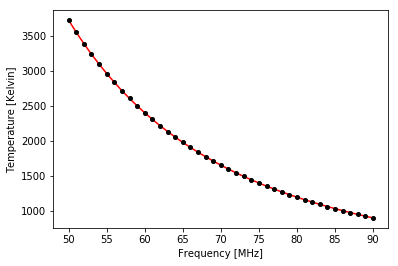

In [17]:
index = Data.index.values
column = Data.columns.values
Temp = Data['2013-06-14 08:00:00.000'].values
plt.xlabel('Frequency [MHz]')
plt.ylabel('Temperature [Kelvin]')
plt.plot(Freqs,Temp,'-r')
plt.plot(Freqs,Temp,'ko', markersize=4)
#plt.xlim(60,90)
#plt.ylim(1900,6500)
#plt.savefig(impath+'FreqvsTemp.png')
plt.show()


In [16]:
Temp

array([ 3862.47921118,  3683.1398504 ,  3515.19009196,  3357.7185974 ,
        3209.90105737,  3070.99135653,  2940.3134805 ,  2817.25163175,
        2701.24730232,  2591.78967408,  2488.4137447 ,  2390.6934983 ,
        2298.23990362,  2210.69541345,  2127.73162638,  2049.04733937,
        1974.36517713,  1903.42907925,  1836.00332681,  1771.87008391,
        1710.82741213,  1652.68885959,  1597.28172303,  1544.44527155,
        1494.03087311,  1445.89993651,  1399.92346912,  1355.98168935,
        1313.96288614,  1273.76257087,  1235.28322304,  1198.43392235,
        1163.12956707,  1129.2905085 ,  1096.84194824,  1065.71396707,
        1035.84092644,  1007.16120729,   979.61677356,   953.15318044,
         927.71934653])